In [1]:
from mdt import *
#import seaborn
%matplotlib inline
%load_ext autoreload
%autoreload

# Load Input

In [2]:
mp.P_T1 = r"^(.*):$"
mp.C_TITLE = ":"
cfg = yaml.load(open("mdt_config.yaml","r").read())
auth_token = cfg['auth_token']
mu.import_from_dropbox(auth_token, "tmp")
dt = mp.parse_md_files("./tmp/"+"*.taskpaper")
del dt["T2"];del dt["T3"];del dt["ID"]

# Task Stats

In [3]:
# Filter tasks only
df = dt[dt.TXT.str.contains("^\s*- ")]
dfs = ms.add_stat(df, "done,p")
dfs.rename(columns={"Filename": "Week", "T1": "Project", "done": "Date", "p":"Time"}, inplace=True)

## Daily Stats

In [4]:
daily = dfs.groupby(['Week',"Date"]).agg({'Time': ['sum'], 'TXT':'count', 'Project':'nunique'})
daily.columns = daily.columns.map(mu.flattenCols)
daily.rename(columns={"TXT_count": "Task_done"}, inplace=True)
daily['Ratio_Time'] = daily.Time_sum / 8
daily['Ratio_Task'] = daily.Task_done / 4
daily['Ratio_Project'] = daily.Project_nunique / 3
dstat = daily.fillna(0).sort_index(0, ascending=False).round(2)
dstat.to_csv("rpt/daily_stats.tsv",sep="\t")
dstat[:10]

Project_nunique  Task_done  Time_sum  \
Week                Date                                               
20172026            2017-02-26                1          5       3.0   
20172019            2017-02-25                2          3       2.0   
                    2017-02-23                1          7       0.0   
                    2017-02-22                1          1       0.0   
                    2017-02-21                1          1       0.0   
                    2017-02-20                1          1       0.0   
20170416            2017-04-17                1          1       0.0   
                    2017-04-16                1          2       0.0   
20170409 Back in LA 2017-04-17                1          2       0.0   
                    2017-04-15                2          2       0.0   

                                Ratio_Time  Ratio_Task  Ratio_Project  
Week                Date                                               
20172026            2017-02-26        0.38        1.25           0.33  
20172019            2017-02-25        0.25        0.75           0.67  
                    2017-02-23        0.00        1.75           0.33  
                    2017-02-22        0.00        0.25           0.33  
                    2017-02-21        0.00        0.25           0.33  
                    2017-02-20        0.00        0.25           0.33  
20170416            2017-04-17        0.00        0.25           0.33  
                    2017-04-16        0.00        0.50           0.33  
20170409 Back in LA 2017-04-17        0.00        0.50           0.33  
                    2017-04-15        0.00        0.50           0.67

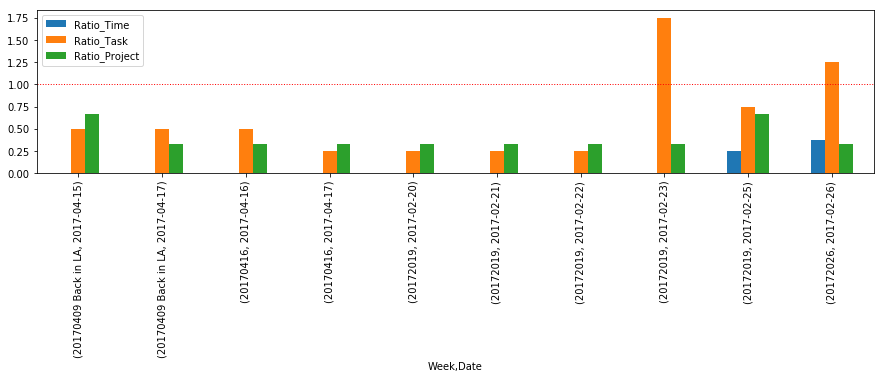

In [9]:
plt = daily.iloc[-10:,3:].plot(kind="bar", figsize=[15,3])
plt.axhline(y=1, linewidth=1, color = 'red', linestyle = 'dotted');

## Weekly Stats

In [6]:
weekly = dfs.groupby(["Week"]).agg({'Time': ['sum'], 'TXT': 'count', 'Date': 'count'})
weekly.columns = weekly.columns.map(mu.flattenCols)
weekly.rename(columns={"TXT_count": "Task_total", "Date_count": "Task_done"}, inplace=True)
weekly.fillna(0).sort_index(0, ascending=False)
weekly['Ratio_Time'] = weekly.Time_sum / 40
weekly['Ratio_Task'] = weekly.Task_done / weekly.Task_total
wstat = weekly.fillna(0).sort_index(0, ascending=False).round(2)
wstat.to_csv("rpt/weekly_stats.tsv",sep="\t")
wstat

,Task_done,Task_total,Time_sum,Ratio_Time,Ratio_Task
Week,,,,,
20172026,5,22,5.0,0.12,0.23
20172019,13,19,2.0,0.05,0.68
20170416,3,7,0.0,0.00,0.43
20170409 Back in LA,5,7,0.0,0.00,0.71
20170402 @ SF,8,16,0.0,0.00,0.50
20170326,18,31,0.0,0.00,0.58
20170319,7,16,0.0,0.00,0.44
20170312,1,4,0.0,0.00,0.25
20170305,13,22,2.0,0.05,0.59


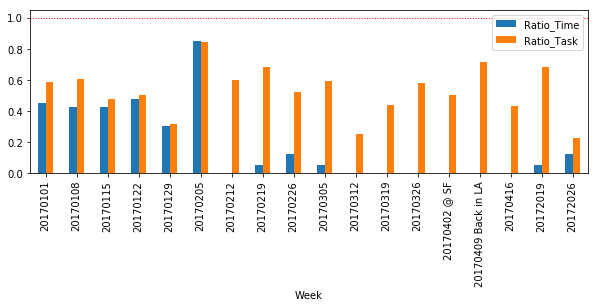

In [10]:
plt = weekly.iloc[:,3:].plot(kind="bar", figsize=[10,3])
plt.axhline(y=1, linewidth=1, color = 'red', linestyle = 'dotted');

# Journal Stats

In [8]:
# Filter journals only
dj = dt[dt.T1.str.contains("^20")]
djs = ms.add_stat(dj, "h")
djs.rename(columns={"Filename": "Week", "T1": "Date", "h":"Happiness"}, inplace=True)

ValueError: cannot index with vector containing NA / NaN values

## Writing Amount

In [ ]:
djsa = djs.groupby(["Date"]).agg({'TXT': ['count']})
plt = djsa[-10:].plot(kind="bar", figsize=[15,3])
plt.legend_.remove()
plt.axhline(y=5, linewidth=1, color = 'red', linestyle = 'dotted');

## Happiness

In [ ]:
djs[~djs.Happiness.isnull()]

In [ ]:
djsa = djs[~djs.Happiness.isnull()].groupby(["Date"]).agg({'Happiness': ['mean']})
plt = djsa.plot(kind="bar", figsize=[10,3])
plt.legend_.remove()
plt.axhline(y=3.5, linewidth=1, color = 'red', linestyle = 'dotted');